# Food Nutrients

This challenge demostrates how to deal with nested json data structure. After unpacking with json package, we end up with a list of dictionaries, but there might be another dictionary within and thus a simple DataFrame constructor will not cut it. 


In [1]:
%matplotlib inline
import json
import pandas as pd 
import matplotlib.pyplot as plt 

json_file = json.load(open('database.json'))
print(json_file[0].keys())
high_level_features = ['id', 'description', 'manufacturer', 'group']

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])


Among these keys, id corresponds to a int 64 value, but 'nutrients' corresponds to another dictionary. Hence, the idea is to construct a high level dataframe for attributes like 'id'. Then for each nutrients dictionary, we make a dataframe and stack these dataframes together. Lastly, linking the high level dataframe with the stacked dataframe by a common key. However, the common key wont be there automatically, so we need to insert this key when buidling the stacked dataframe. Here's demo of how to do it.

In [2]:
high_level_df =pd.DataFrame(json_file, columns=high_level_features)

stacked_nutrients = []
for dict_ in json_file:
    nutrients = pd.DataFrame(dict_['nutrients'])
    nutrients['id'] = dict_['id'] #insert id so that we can merge them later
    stacked_nutrients.append(nutrients)
    
nutrients_df = pd.concat(stacked_nutrients, axis=0, join='outer', ignore_index=True)
nutrients_df.drop_duplicates(inplace=True)

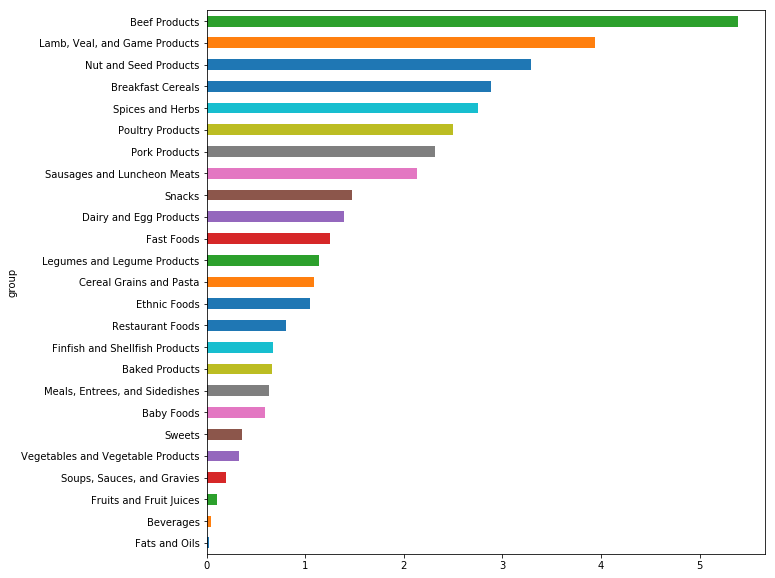

In [3]:
combined = pd.merge(high_level_df, nutrients_df, how='left', on='id', suffixes=['', '_nutrients'])
nutrient_chart=combined.groupby(['group', 'description_nutrients']).quantile(0.5)['value'].sort_values()

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(1,1,1)
nutrient_chart.loc[:, 'Zinc, Zn'].plot.barh(ax=ax)

In [28]:
combined.groupby(['group_nutrients']).count()
combined = combined.rename({'description':'food', 'group':'food_category', 
                 'description_nutrients':'nutrients', 
                 'group_nutrients': 'nutrients_group'}, axis=1)

In [29]:
def get_max(df):
    return df.loc[df.value.idxmax()]

In [30]:
best_by_each_kind = combined.groupby(['nutrients_group', 'nutrients']).apply(get_max)
best_by_each_kind.loc['Amino Acids']['food']

## Side note 

There's a few ways to get the argmax. If it's series, we can use nlargest and idxmax and if it's np array we can use argmax

In [37]:
import numpy as np 
arr = np.array(np.random.randn(100))

In [40]:
arr[arr.argsort()] #argsort comes with sorted index, which can be used in fancy indexing

array([-2.4037073 , -2.28978126, -2.19561841, -2.19046416, -2.00170511,
       -1.86401972, -1.74037983, -1.7362119 , -1.69111909, -1.68654285,
       -1.62713518, -1.60190631, -1.46910064, -1.35833993, -1.31692664,
       -1.19235999, -1.12942673, -1.10345285, -1.09701931, -1.03682856,
       -0.95471351, -0.88154837, -0.85923409, -0.76271664, -0.72767248,
       -0.70573295, -0.68430038, -0.67404724, -0.66128388, -0.6258082 ,
       -0.61062789, -0.55290881, -0.5473306 , -0.47065881, -0.46617195,
       -0.43631206, -0.40051794, -0.38300811, -0.37947531, -0.37306777,
       -0.3697443 , -0.30741684, -0.29472108, -0.27417917, -0.23910935,
       -0.12165139, -0.12053801,  0.02229112,  0.03075056,  0.03988469,
        0.09467425,  0.1167633 ,  0.17500241,  0.23097662,  0.23685404,
        0.25398605,  0.30494579,  0.32955585,  0.34965721,  0.36256382,
        0.36744556,  0.38991449,  0.39522532,  0.39587794,  0.40034406,
        0.4240408 ,  0.46977965,  0.47617899,  0.52132689,  0.56

In [47]:
print(arr.argmax())#index of max value
print(arr.argmin()) #index of min value

33
47


In [48]:
print(pd.Series(arr).idxmax())
print(pd.Series(arr).idxmin())

33
47
